In [71]:
import pandas as pd
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [72]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [73]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [74]:
new_columns = ['Package','Month','Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [75]:
average_price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.to_datetime(pumpkins['Date']).dt.month

In [76]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'],'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Average Price': average_price})
print(new_pumpkins)

      Month               Package  Low Price  High Price  Average Price
70        9  1 1/9 bushel cartons      15.00        15.0         15.000
71        9  1 1/9 bushel cartons      18.00        18.0         18.000
72       10  1 1/9 bushel cartons      18.00        18.0         18.000
73       10  1 1/9 bushel cartons      17.00        17.0         17.000
74       10  1 1/9 bushel cartons      15.00        15.0         15.000
...     ...                   ...        ...         ...            ...
1738      9    1/2 bushel cartons      15.00        15.0         15.000
1739      9    1/2 bushel cartons      13.75        15.0         14.375
1740      9    1/2 bushel cartons      10.75        15.0         12.875
1741      9    1/2 bushel cartons      12.00        12.0         12.000
1742      9    1/2 bushel cartons      12.00        12.0         12.000

[415 rows x 5 columns]


In [77]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price'] = average_price/(1+ 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = average_price/2

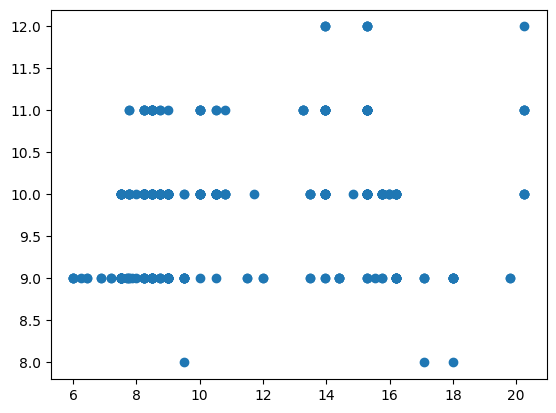

In [78]:
import matplotlib.pyplot as plt
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

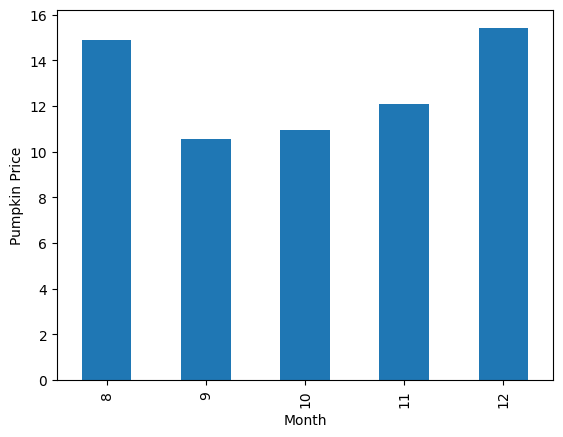

In [79]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')